Tasks:
Using the pre-processed data from the file demographics.txt or demographics.xls obtained
from the previous tasks:
1. Using the feature Group (“PD” or “CO”) as outcome, determine the probability of a subject having Parkinson’s disease based on the available independent variable with logistic regression.
2. What are the values of the beta coefficients? Give the expression of the regression line for each independent variable.
3. Plot the results of the regression.
4. What are the values of the mean absolute error (MAE) and the Root Mean Square Error (RMSE)? Conclude.

In [10]:
# Prepare the regression model

from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score


df_x = pd.read_csv('../task_one/imputed_data_knn.csv', sep=',')

# Mix the dataset
df_x = df_x.sample(frac=1)
df_y = df_x["Group"]

# Removing non independent variables and non-relevant ones; ID and Study are not relevant for the results as they are just defined for recognizing the results
df_x = df_x.drop(columns=["Group", "ID", "Study"])

#Data split into train and test:
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(df_x, df_y, test_size=0.40)

# Increase iterations because default 100 does not converge
regression = LogisticRegression(max_iter=3000)

regression.fit(df_x_train, df_y_train)

#Evaluate the model:
print("Mean Accuracy on training data: %f" % regression.score(df_x_train, df_y_train))
print("Mean Accuracy on test data: %f" % regression.score(df_x_test, df_y_test))

y_pred_train = regression.predict(df_x_train)
y_pred_test = regression.predict(df_x_test)

f1_score_train = f1_score(df_y_train, y_pred_train)
f1_score_test = f1_score(df_y_test, y_pred_test)
print("F1-score on training data: %f" % f1_score_train)
print("F1-score on test data: %f" % f1_score_test)


Mean Accuracy on training data: 0.888889
Mean Accuracy on test data: 0.791045
F1-score on training data: 0.899083
F1-score on test data: 0.810811


In [11]:
import numpy as np
np.set_printoptions(suppress=True)
# 1. Using the feature Group (“PD” or “CO”) as outcome, determine the probability of a subject having Parkinson’s disease based on the available independent variable with logistic regression.

# Calculate the predicted probabilities; Documentation:
# Probability estimates.
# The returned estimates for all classes are ordered by the label of classes.
predicted_probabilities = regression.predict_proba(df_x_train)

# Get index for the PD group (1)
index_pd = regression.classes_.tolist().index(1)

# Get index for the CO group (2)
index_co = regression.classes_.tolist().index(2)

# Access the probabilities for each group
probability_pd = predicted_probabilities[:, index_pd]
probability_co = predicted_probabilities[:, index_co]

# compare accuracy with ground truth

# calculate the mean probabilities for each group
print("Average Probability of PD:")
print(probability_pd.mean())

print("\n Total probabilities of PD:")
print(probability_pd)

print("\nAverage Probability of CO:")
print(probability_co.mean())

print("\n Total probabilities of CO:")
print(probability_co)

Average Probability of PD:
0.5454611865980034

 Total probabilities of PD:
[0.95409985 0.99947834 0.99654995 0.65663305 0.84164815 0.0262566
 0.43743492 0.54951677 0.00428182 0.02635181 0.99997006 0.00134119
 0.96009222 0.68397451 0.00068907 0.00260832 0.0042272  0.00186268
 0.99894481 0.78078112 0.0187921  0.00139767 0.93877518 0.68374528
 0.69412759 0.00238395 0.00465253 0.26466168 0.98608953 0.00180924
 0.00550165 0.00671323 0.95591345 0.9666768  0.00740516 0.00437974
 0.96884855 0.94271142 0.96235104 0.48011062 0.31628388 0.48529383
 0.58938015 0.00922473 0.00570182 0.79378849 0.91440453 0.99991721
 0.99972711 0.98903514 0.99117828 0.95710601 0.98176862 0.82146521
 0.02370485 0.00488605 0.92782618 0.96687968 0.98662247 0.9723999
 0.99998136 0.96804216 0.58287115 0.5994688  0.0043742  0.00766348
 0.00410657 0.97307895 0.96650953 0.00573422 0.89472658 0.38820752
 0.21615573 0.99757276 0.07752856 0.82125269 0.00707445 0.66779353
 0.93619875 0.99755631 0.02623651 0.99976803 0.41296218 

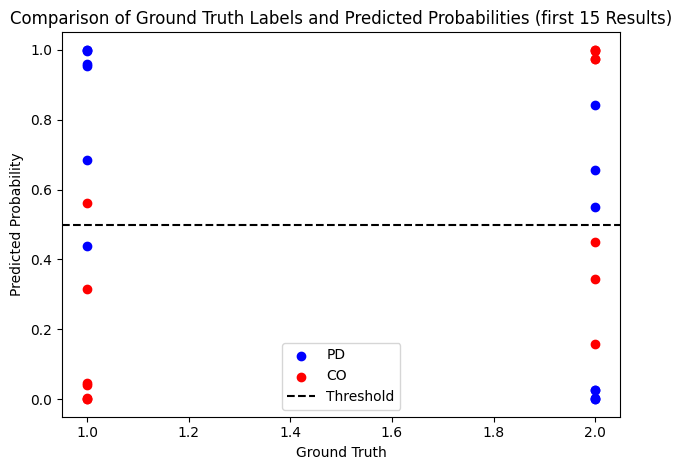


    Looking at the visual comparison, we can see that aside from some outliers, the probabilites for each of the ground truth results seems rather fitting.
    The points with the value 1 have a high probability for being PD (which they are) and a low probability for CO (which they are not) and vice versa.
    


In [12]:
# Get the predicted probabilities for PD and CO classes for the first 15 results
probability_pd = predicted_probabilities[:15, 0]
probability_co = predicted_probabilities[:15, 1]
ground_truth = df_y_train[:15]

# Plot the ground truth labels vs. predicted probabilities
plt.scatter(ground_truth, probability_pd, color='blue', label='PD')
plt.scatter(ground_truth, probability_co, color='red', label='CO')
plt.axhline(y=0.5, color='black', linestyle='--', label='Threshold')
plt.xlabel('Ground Truth')
plt.ylabel('Predicted Probability')
plt.title('Comparison of Ground Truth Labels and Predicted Probabilities (first 15 Results)')
plt.legend()

plt.tight_layout()
plt.show()

print("""
    Looking at the visual comparison, we can see that aside from some outliers, the probabilites for each of the ground truth results seems rather fitting.
    The points with the value 1 have a high probability for being PD (which they are) and a low probability for CO (which they are not) and vice versa.
    """)


In [13]:
# 2. What are the values of the beta coefficients? Give the expression of the regression line for each independent variable.

# documentation: Coefficient of the features in the decision function.
beta_coefficients = regression.coef_

columns = df_x_train.columns

print("Beta Coefficients:")
for i, coef in enumerate(beta_coefficients[0]):
    print('{:>12}  {:>10}  {:>25}  {:>30}'.format(columns[i], f"β{i+1} =", coef, f"alternatively {coef:.4f} * x_{{{columns[i]}}}"))

Beta Coefficients:
     Subjnum        β1 =        -0.0191164668744777  alternatively -0.0191 * x_{Subjnum}
      Gender        β2 =       -0.48439129150969723  alternatively -0.4844 * x_{Gender}
         Age        β3 =       -0.08587287593116362  alternatively -0.0859 * x_{Age}
      Height        β4 =      -0.057956801662502055  alternatively -0.0580 * x_{Height}
      Weight        β5 =       0.029165068460547235  alternatively 0.0292 * x_{Weight}
   HoehnYahr        β6 =       -0.46976123779278084  alternatively -0.4698 * x_{HoehnYahr}
       UPDRS        β7 =       -0.08628104087472759  alternatively -0.0863 * x_{UPDRS}
      UPDRSM        β8 =       -0.18283774914495599  alternatively -0.1828 * x_{UPDRSM}
        TUAG        β9 =       -0.25440012250806415  alternatively -0.2544 * x_{TUAG}
    Speed_01       β10 =         0.4222853197343331  alternatively 0.4223 * x_{Speed_01}
    Speed_02       β11 =        0.08162418735252229  alternatively 0.0816 * x_{Speed_02}
    Speed_03  

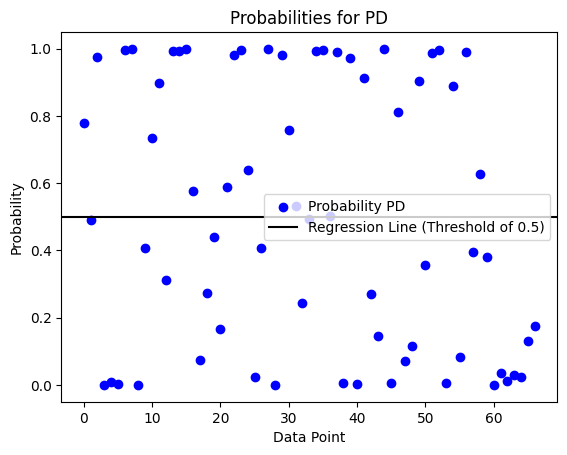

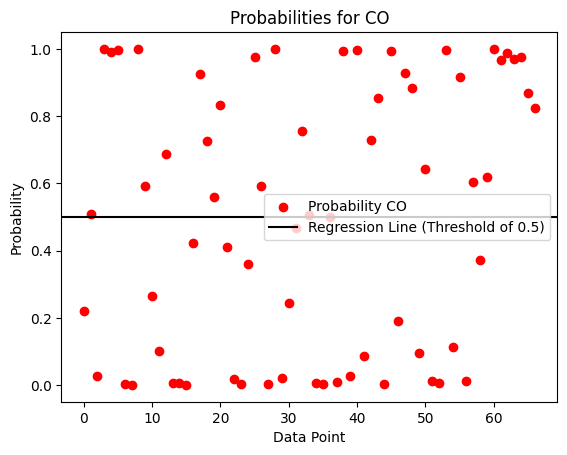

In [14]:
# 3. Plot the results of the regression. TODO Ask like this?? or like I did previously
columns = df_x_train.columns
num_cols = len(columns)
probabilities = regression.predict_proba(df_x_test)

# Extract the probabilities for each class
probability_pd = probabilities[:, 1]  # Probabilities for the positive class (PD)
probability_co = probabilities[:, 0]  # Probabilities for the negative class (CO)

# Plot probabilities for PD
plt.scatter(range(len(probability_pd)), probability_pd, color='blue', label='Probability PD')
plt.axhline(y=0.5, color='black', linestyle='-', label='Regression Line (Threshold of 0.5)')
plt.xlabel('Data Point')
plt.ylabel('Probability')
plt.title('Probabilities for PD')
plt.legend()
plt.show()

# Plot probabilities for CO
plt.scatter(range(len(probability_co)), probability_co, color='red', label='Probability CO')
plt.axhline(y=0.5, color='black', linestyle='-', label='Regression Line (Threshold of 0.5)')
plt.xlabel('Data Point')
plt.ylabel('Probability')
plt.title('Probabilities for CO')
plt.legend()
plt.show()


We can visualized the calculation of the regression (probabilities) with the predicted results:


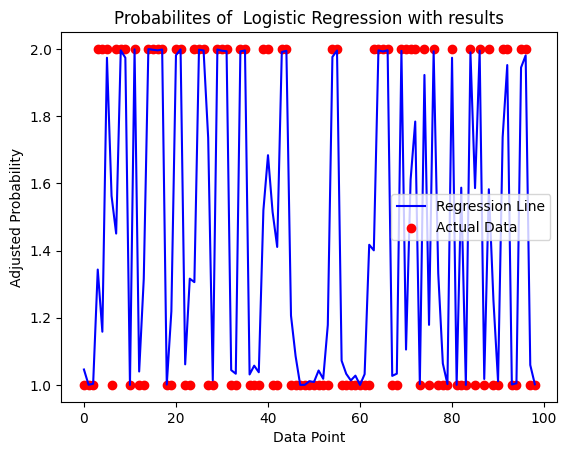

In [15]:
import numpy as np
print("We can visualized the calculation of the regression (probabilities) with the predicted results:")

# Retrieve the beta coefficients
beta_coefficients = regression.coef_[0]
intercept = regression.intercept_[0]

# Create a range of x-values
x_values = np.linspace(0, len(df_x_train)-1, len(df_x_train))

# Compute the values of the betacoefficients with the x values to calculate the actual logistic function values.
log_odds = intercept + np.dot(df_x_train, beta_coefficients)

# Compute the predicted probabilities
predicted_probabilities = 1 / (1 + np.exp(-log_odds))

# Adjust the predicted probabilities by adding 1
adjusted_probabilities = predicted_probabilities + 1

# Plot the regression line
plt.plot(x_values, adjusted_probabilities, color='blue', label='Regression Line')
plt.scatter(x_values, df_y_train, color='red', label='Actual Data')
plt.xlabel('Data Point')
plt.ylabel('Adjusted Probability')
plt.title('Probabilites of  Logistic Regression with results')
plt.legend()
plt.show()


Alternatively, we can graphically compare the predicted results with the ground truth:


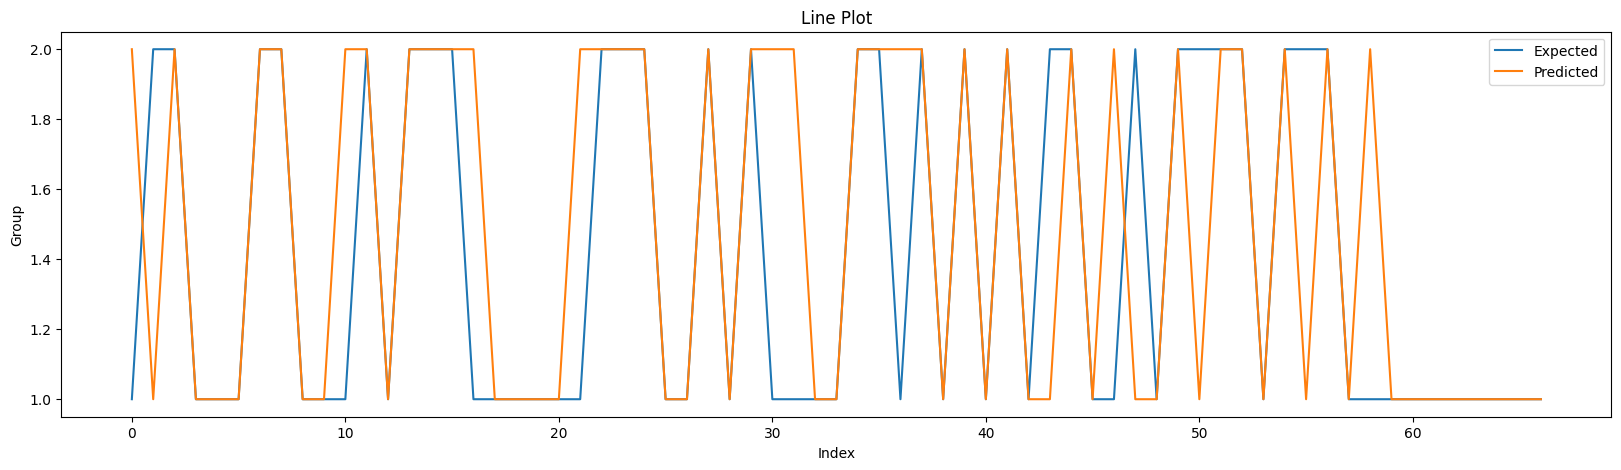

In [16]:
print("Alternatively, we can graphically compare the predicted results with the ground truth:")

y_pred = regression.predict(df_x_test)
# Create figure and axis
fig, ax = plt.subplots(figsize=(20, 5))
x = list(range(len(y_pred)))
# Plot the lines
ax.plot(x, df_y_test, label='Expected')
ax.plot(x, y_pred, label='Predicted')

# Set labels and title
ax.set_xlabel('Index')
ax.set_ylabel('Group')
ax.set_title('Line Plot')

# Add a legend
ax.legend()

# Show the plot
plt.show()

# Use threshold to plot probabilities like linear regression

In [17]:
# 4. What are the values of the mean absolute error (MAE) and the Root Mean Square Error (RMSE)? Conclude.
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math 

test = df_y_test.to_list()
mae = 0
length = len(y_pred)

#mean absolute error
for i in range(length):
    res = abs(test[i] - y_pred[i])
    mae = mae + res

mae_final = mae / length
print(f"the mean absolute error manually calculated is {mae_final}")

rmse = 0
for i in range(length):
    res = math.pow(test[i] - y_pred[i], 2)
    rmse = rmse + res

rmse_final = math.sqrt(rmse / length)
print(f"the root mean squared error manually calculated is {rmse_final}")
df = pd.DataFrame()
print(f"the mean absolute error using sklearn is {mean_absolute_error(df_y_test, y_pred)}")
print(f"the root mean squared error using sklearn is {np.sqrt(mean_squared_error(df_y_test, y_pred))}")

the mean absolute error manually calculated is 0.208955223880597
the root mean squared error manually calculated is 0.45711620391383745
the mean absolute error using sklearn is 0.208955223880597
the root mean squared error using sklearn is 0.45711620391383745
